In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


<AxesSubplot:>

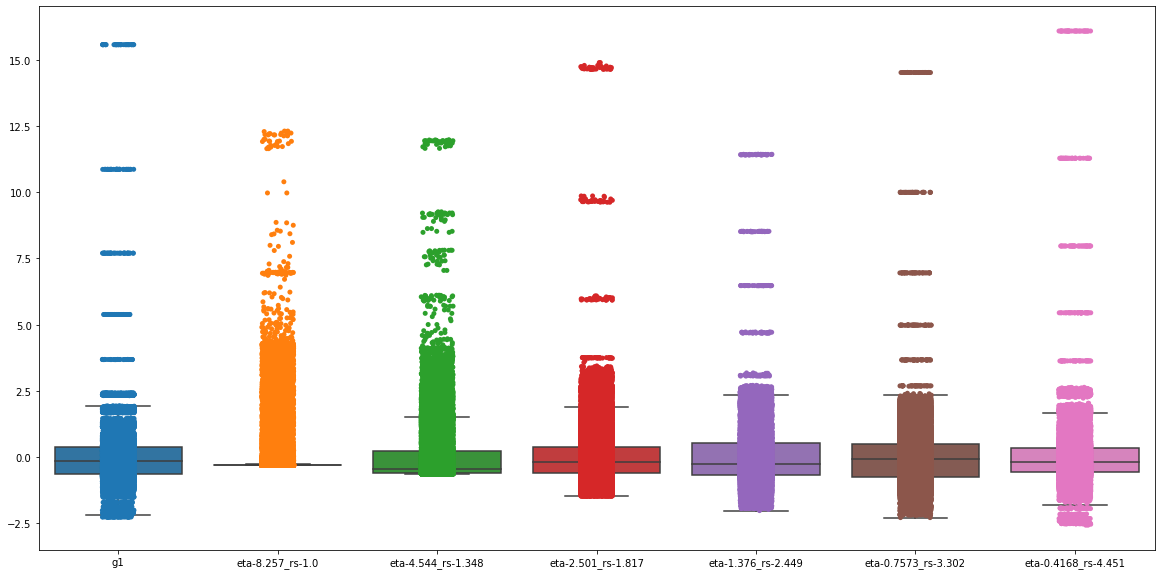

In [19]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
df = pd.read_csv('/Users/y1u0d2/desktop/Lab/result/sf/Si/02/sf_1.csv')
# df = df.drop(df.loc[df['structure_id']=='mp-149_dimer'].index)
df_std = pd.DataFrame(data=scaler.fit_transform(df.drop('structure_id', axis=1)), columns=df.columns[:-1])

df_std['structure_id'] = df['structure_id']
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
sns.boxplot(data=df_std, showfliers=False, ax=ax)
sns.stripplot(data=df_std, jitter=True, ax=ax)

<AxesSubplot:xlabel='sf', ylabel='Value'>

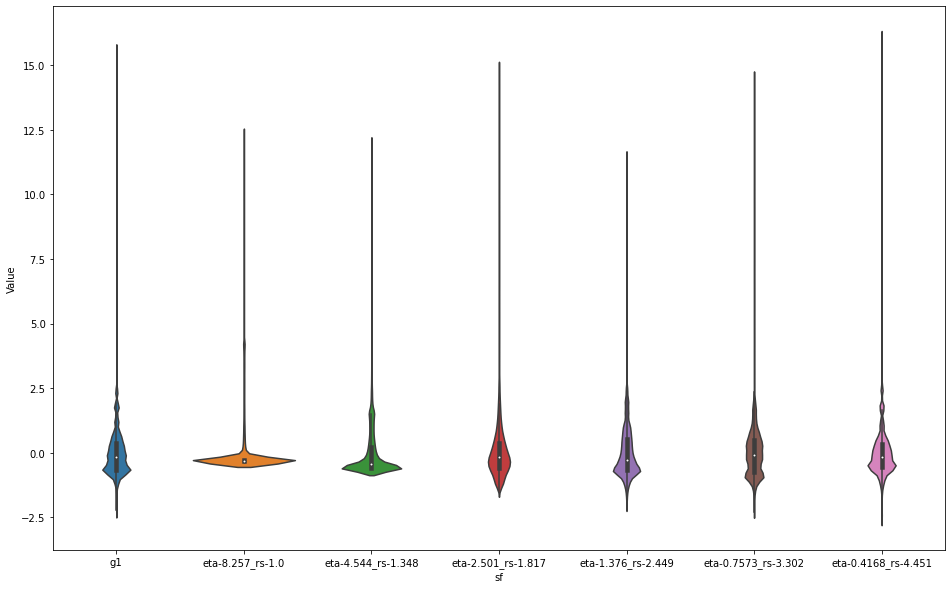

In [23]:
long_df = df_std.melt(id_vars=['structure_id'], var_name='sf', value_name='Value')

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

# sns.boxplot(data=long_df,x='sf', y='Value', showfliers=False, ax=ax)
sns.violinplot(data=long_df, x='sf', y='Value', ax=ax)
# sns.stripplot(data=long_df, x='sf', y='Value', hue='structure_id', ax=ax)

In [4]:
pair_columns = list(filter(lambda x: 'eta' in x, df_std.columns))

In [5]:
# sns.pairplot(df_std, vars=pair_columns)

In [6]:
from sklearn.decomposition import PCA

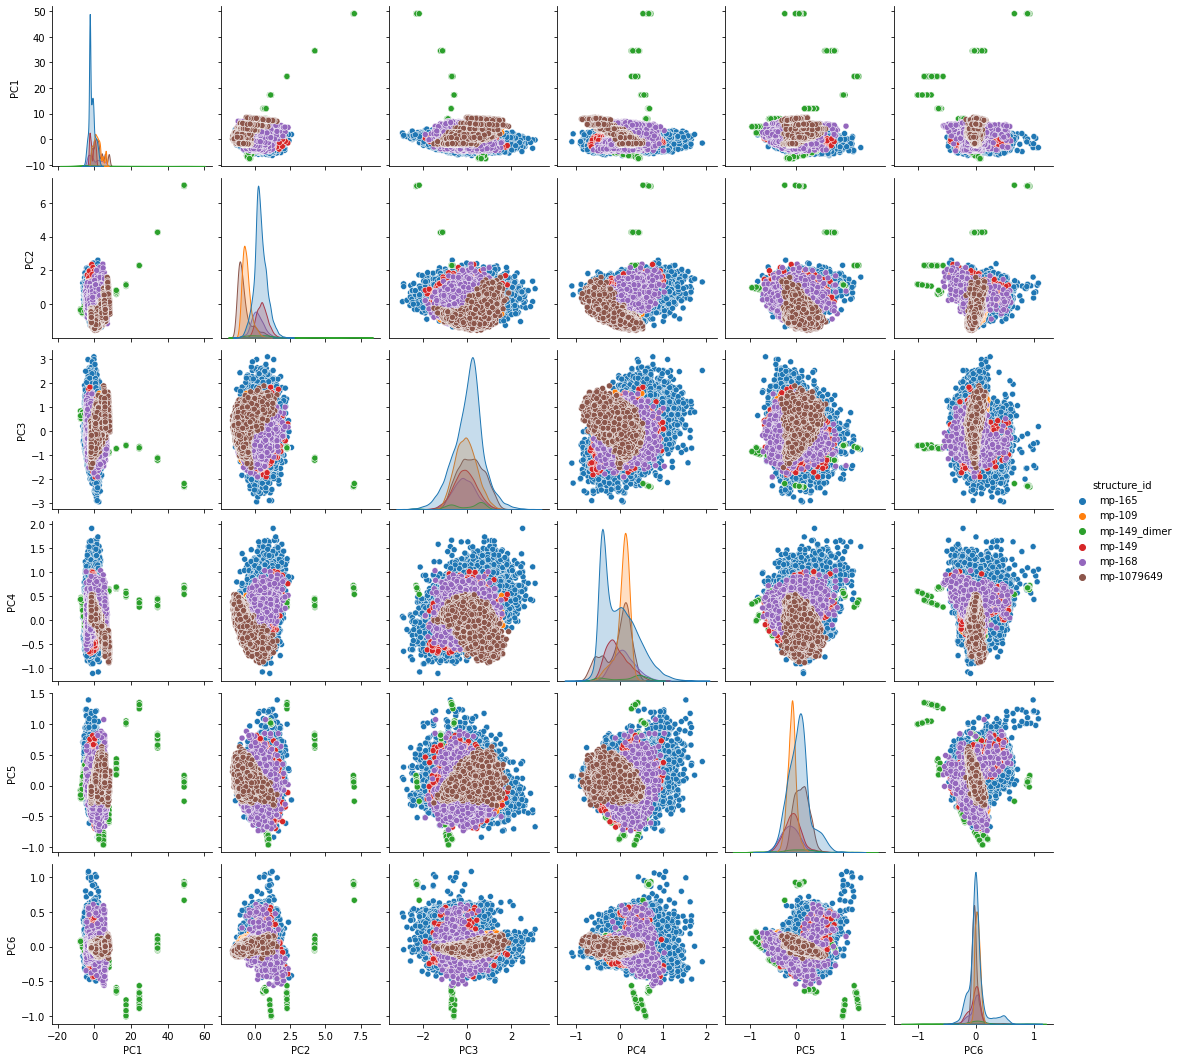

In [7]:
pca_columns = list(filter(lambda x: 'eta-' in x, df.columns))
pca_df = df[pca_columns]

pca = PCA()
feature = pca.fit_transform(pca_df)

pca_df = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(pca_df.columns))])
pca_df = pd.concat([pca_df, df['structure_id']], axis=1)

# sns.scatterplot(x='PC2', y='PC3', data=pca_df, hue='structure_id')
sns.pairplot(pca_df, hue='structure_id')

In [8]:
from sklearn.manifold import  TSNE

tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)

tsne_df = df[pca_columns]
tsne_df = tsne.fit_transform(tsne_df)

/Users/y1u0d2/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/y1u0d2/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [9]:
tsne_df = pd.DataFrame(tsne_df, columns=['col1', 'col2'])

In [10]:
tsne_df = pd.concat([tsne_df, df['structure_id']], axis=1)

<AxesSubplot:xlabel='col1', ylabel='col2'>

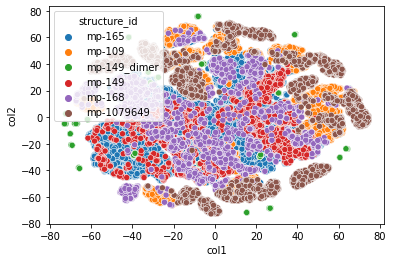

In [11]:
sns.scatterplot(data=tsne_df, x='col1', y='col2', hue='structure_id')

In [12]:
pca.explained_variance_ratio_

array([0.91313851, 0.04217159, 0.03031128, 0.00888822, 0.00418004,
       0.00131035])

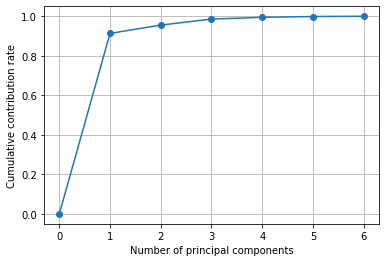

In [13]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

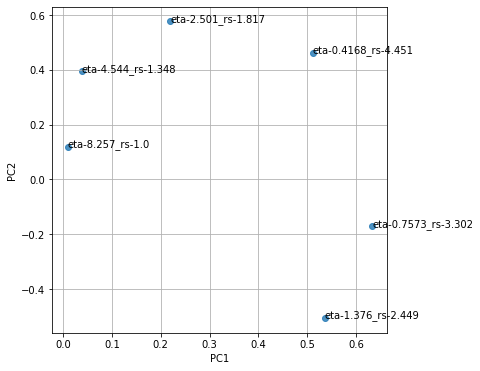

In [14]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], pca_columns):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()